Antes de nada, hay que importar los paquetes necesarios.

In [1]:
%pylab inline
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


# Lectura de los datos

A continuación, se define una función para cargar los datos que se encuentran en las carpetas **data/20news-bydate-train/** y **data/20news-bydate-test/**. Los datos tendrán la siguiente estructura:

+ data/
    + 20news-bydate-train/
        + category_name_1/
            + file_1.txt
            + file_2.txt
            + ...
        + category_name_2/
            + file_1.txt
            + file_2.txt
            + ...
    + 20news-bydate-test/
        + category_name_1/
            + file_1.txt
            + file_2.txt
            + ...
        + category_name_2/
            + file_1.txt
            + file_2.txt
            + ...
            
En total, debe haber **20 categorías**.

In [2]:
def loadDataset(directory):
    dataset = datasets.load_files(directory)
    
    print "Loaded %d documents" % len(dataset.data)
    print "Loaded %d categories" % len(dataset.target_names)
    print "Categories ",dataset.target_names
    print
    
    return dataset

Una vez definida la función, se cargan los datos de entrenamiento y test.

In [3]:
print "Loading data train..."
data_train = loadDataset("data/20news-bydate-train/")

print "Loading data test...."
data_test = loadDataset("data/20news-bydate-test/")

Loading data train...
Loaded 11314 documents
Loaded 20 categories
Categories  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Loading data test....
Loaded 7532 documents
Loaded 20 categories
Categories  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']



A continuación, se inspeccionará el algún archivo del dataset para ver su contenido y su categoría:

In [4]:
print "Message:"
print data_train.data[5]

print "Category: %s " % data_train.target_names[5]

Message:
From: taihou@chromium.iss.nus.sg (Tng Tai Hou)
Subject: ADB and graphics tablet help!
Organization: Institute Of Systems Science, NUS
Lines: 13

Help!!!

I have an ADB graphicsd tablet which I want to connect to my
Quadra 950. Unfortunately, the 950 has only one ADB port and
it seems I would have to give up my mouse.

Please, can someone help me? I want to use the tablet as well as
the mouse (and the keyboard of course!!!).

Thanks in advance.

Tai Hou TNG
Singapore

Category: comp.windows.x 


¿Cómo se podrían obtener los nombres de las categorías de los 10 primeros archivos?

In [5]:
print data_train.target_names[:10]

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball']


# Extraer información de los archivos

Antes de aplicar técnicas de machine learning a los datasets, en este caso documentos de texto, hay que convertir dicho  texto en vectores numéricos.

### Procesado de texto y creación de un diccionario

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
count_vect = CountVectorizer(decode_error = 'ignore', lowercase=True, strip_accents="unicode")
X_train_counts = count_vect.fit_transform(data_train.data)
X_train_counts.shape

(11314, 130093)

Descarga de las stopwords:

In [8]:
import nltk
nltk.download("stopwords")
english_stopwords = nltk.corpus.stopwords.words('english')
stopwords = set(english_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
count_vect = CountVectorizer(decode_error = 'ignore', lowercase=True, strip_accents="unicode", stop_words = stopwords)
X_train_counts = count_vect.fit_transform(data_train.data)
X_train_counts.shape

(11314, 129970)

Conversión del diccionario **de ocurrencias a frecuencias**. El término **tf-idf** (term frequency-inverse document frequency) es un término estadístico que refleja cómo de importante es una palabra en un documento. Es muy utilizado en *text mining*.

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(11314, 129970)

In [11]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 129970)

# Entrenamiento y creación de un modelo

In [12]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, data_train.target)

In [17]:
docs_new = ['God is love', 'OpenGL on the GPU is fast', 'I want to buy a new motorcycle']
X_new_counts = count_vect.transform(data_test.data)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

prediction = clf.predict(X_new_tfidf)

#for doc, category in zip(docs_new, predicted):
#    print('%r => %s' % (doc, data_train.target_names[category]))

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data_test.target, prediction)

In [24]:
def plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[213   0   0   1   0   1   0   1   2   1   1   3   0   7   4  71   5   6
    1   2]
 [  1 275  16  13   8  20   3   4   1   6   2  21   5   0   8   2   3   1
    0   0]
 [  1  18 275  43   4  13   1   1   4   4   2  13   1   0   5   8   1   0
    0   0]
 [  0   5  16 313  16   2  10   4   1   0   2   4  14   0   5   0   0   0
    0   0]
 [  0   3  10  22 313   2   7   3   1   3   1   7   7   1   2   1   2   0
    0   0]
 [  1  28  18  11   1 311   1   0   1   1   0  12   0   1   4   3   2   0
    0   0]
 [  0   2   3  28  10   1 302  13   2   3   6   2   8   6   1   2   1   0
    0   0]
 [  0   1   0   3   0   0   5 365   3   2   3   2   3   1   3   0   4   0
    1   0]
 [  0   0   0   1   0   0   4  10 380   0   0   1   1   0   0   0   1   0
    0   0]
 [  0   0   0   0   1   0   0   4   0 364  23   0   0   0   2   1   1   1
    0   0]
 [  0   0   0   0   0   0   0   0   0   4 390   1   0   0   1   3   0   0
    0   0]
 [  0   2   2   0   0   1

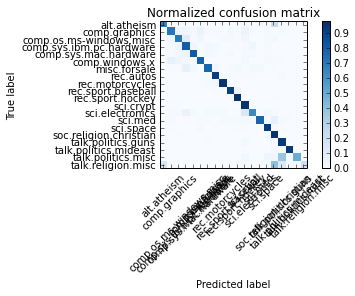

In [25]:
print('Confusion matrix, without normalization')
print(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, data_train.target_names, title='Normalized confusion matrix')

plt.show()